# Задача 1

Даны результаты измерений максимальной скорости испытаний спортивного
самолета, м/с:

431; 398; 423; 401; 423; 404; 389; 428; 402; 404; 427; 398; 422; 409; 420; 422;  
397; 458; 403; 411; 398; 408; 438; 414; 413; 404; 426; 434; 430; 397; 383; 415;  
418; 438; 394; 417; 412; 404; 389; 398; 431; 423; 401; 423; 435; 427; 428; 405;  
414; 415; 439; 409; 391; 416; 419; 401; 372; 395; 418; 413; 407; 445; 428; 420;  
429; 395; 433; 406; 402; 398; 399; 432; 405; 412; 425; 417; 424; 416; 396; 403;  
432; 402; 431; 419; 423; 441; 424; 410; 424; 413; 393; 412; 302; 408; 437; 416;  
436; 415; 421; 407; 404; 404; 403; 434; 412; 419; 405; 402; 394; 423; 398; 415;  
401; 398; 428; 416; 453; 371; 424; 417.  

Для заданной выборки:

1) постройте статистический ряд и интервальный статистический ряд, предварительно определив число интервалов  
2) найдите значения точечных оценок математического ожидания и дисперсии  
3) постройте гистограмму  
4) на основе анализа результатов наблюдений выдвинете гипотезу о виде закона распределения генеральной совокупности  

In [1]:
#!/usr/bin/python
# -*- coding: utf-8 -*-

%matplotlib inline

import os, sys, math
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import display, HTML

## Выборка данных

Даны результаты измерений максимальной скорости испытаний спортивного самолета, м/с:

In [2]:
# Датасет
a = [431, 398, 423, 401, 423, 404, 389, 428, 402, 404,
     427, 398, 422, 409, 420, 422, 397, 458, 403, 411,
     398, 408, 438, 414, 413, 404, 426, 434, 430, 397,
     383, 415, 418, 438, 394, 417, 412, 404, 389, 398,
     431, 423, 401, 423, 435, 427, 428, 405, 414, 415,
     439, 409, 391, 416, 419, 401, 372, 395, 418, 413,
     407, 445, 428, 420, 429, 395, 433, 406, 402, 398,
     399, 432, 405, 412, 425, 417, 424, 416, 396, 403,
     432, 402, 431, 419, 423, 441, 424, 410, 424, 413,
     393, 412, 302, 408, 437, 416, 436, 415, 421, 407,
     404, 404, 403, 434, 412, 419, 405, 402, 394, 423,
     398, 415, 401, 398, 428, 416, 453, 371, 424, 417]

a.sort()

# Считаем количество уникальных
stat_a = Counter(a)

## Количество интервалов

По формуле Стержеса:

$ k = 1 + 3,32 * \lg n $

Где k - количество интервалов, n - размер выборки

In [3]:
icount = int(round(1 + 3.32 * math.log10(len(a))))

Размер интервала:
$$ \Delta a = \frac{a_{max} - a_{min}}{k} $$

Где k - количество интервалов, $a_{max}, a_{min}$ - максимальный и минимальный элементы выборки

In [4]:
da = (max(a) - min(a)) / icount;

print "Количество интервалов:\t", icount
print "Размер интервала:\t", da
print
print "min \t=", min(a), "\nmax \t=", max(a)
print "Медиана =", a[len(a)/2]

Количество интервалов:	8
Размер интервала:	19

min 	= 302 
max 	= 458
Медиана = 414


## Статический ряд

In [5]:
s = "<style></style><table><tr><th>Значение</th><th>Частота</th></tr>"
for key, val in stat_a.items():
    s += '<tr><td>{}</td><td>{}</td></tr>'.format(key, val)
s += "</table>"
display(HTML(s))

Значение,Частота
389,2
391,1
393,1
394,2
395,2
396,1
397,2
398,7
399,1
401,4


## Находим интервалы

In [6]:
bins = []

for i in range(icount):
    bins.append(min(a) + i*da)
    print min(a) + i*da, "-", min(a) + (i+1)*da

bins.append(max(a))

302 - 321
321 - 340
340 - 359
359 - 378
378 - 397
397 - 416
416 - 435
435 - 454


## Интервальный статический ряд

In [7]:
hist, bins = np.histogram(a, bins=bins)
bin_counts = zip(bins, bins[1:], hist)

s = "<style></style><table><tr><th>Интервал</th><th>Частота</th></tr>"
for bin_start, bin_end, count in bin_counts:
    s += '<tr><td>{} - {}</td><td>{}</td></tr>'.format(bin_start, bin_end, count)
s += "</table>"
display(HTML(s))

Интервал,Частота
302 - 321,1
321 - 340,0
340 - 359,0
359 - 378,2
378 - 397,10
397 - 416,52
416 - 435,45
435 - 458,10


## Гистограмма по интервальным значениям

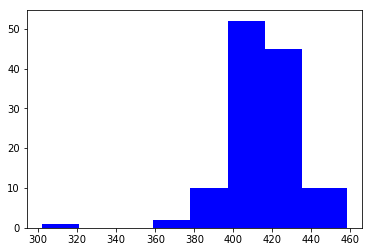

In [8]:
plt.hist(a, bins, color="blue")
plt.show()

## Точечные оценки выборки

Среднее выборочное (оценка мат. ожидания):
$$ {\bar {X}}={\frac {1}{n}}\sum \limits _{i=1}^{n}X_{i} $$

Выборочная дисперсия:
$$ S^{2}={\frac  {1}{n-1}}\sum \limits _{{i=1}}^{n}\left(X_{i}-{\bar  {X}}\right)^{2} $$

Где X - выборка, $X_i$ - i-й элемент выборки, n - размер выборки

In [9]:
print "Среднее выборочное:\t", (0.0+np.sum(a))/len(a)
print "Исправленная дисперсия:\t", np.var(a)
print "Ср. кв. отклонение:\t", np.std(a)

Среднее выборочное:	412.95
Исправленная дисперсия:	338.6975
Ср. кв. отклонение:	18.4037360338


Из метрик, приведенных выше можно сделать вывод:  
Данная случайная величина имеет нормальное распределение

## Пример нормального распределения

$f(x) = {\displaystyle {\frac {1}{\sigma {\sqrt {2\pi }}}}\;\exp \left(-{\frac {\left(x-\mu \right)^{2}}{2\sigma ^{2}}}\right)}$

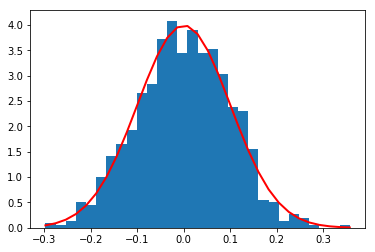

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation

s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()